<a href="https://colab.research.google.com/github/aekanun2020/2022-PSU-Data-Science-for-Tourism-Course2/blob/main/COLAB_DemoLecture_SimpleLinearRegression_with_BatchGD_from_Scratch_using_Pyspark-FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.1/spark-2.4.1-bin-hadoop2.7.tgz
!tar xf spark-2.4.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.1-bin-hadoop2.7"

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
from pyspark.sql import SparkSession

In [5]:
sc = spark.sparkContext

In [6]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

สร้างข้อมูลขึ้นมาเป็น Python's List of tuple แล้วให้ Spark ทำการ Load&Convert เป็น Spark's DataFrame

In [7]:
import numpy as np

In [8]:
raw_df = spark.createDataFrame([(2,15)\
                                ,(3,28)\
                                ,(5,42)\
                                ,(13,64)\
                                ,(8,50)\
                                ,(16,90)\
                                ,(11,58)\
                                ,(1,8)\
                                ,(9,54)], 
                           ['yoe','salary'])

In [9]:
raw_df.show(20)

+---+------+
|yoe|salary|
+---+------+
|  2|    15|
|  3|    28|
|  5|    42|
| 13|    64|
|  8|    50|
| 16|    90|
| 11|    58|
|  1|     8|
|  9|    54|
+---+------+



แปลงจาก Spark’s DataFrame ไปเป็น Python Numpy’s Array.

In [10]:
data_array = np.array(raw_df.collect())

**Require: set of training instances D**

In [11]:
data_array

array([[ 2, 15],
       [ 3, 28],
       [ 5, 42],
       [13, 64],
       [ 8, 50],
       [16, 90],
       [11, 58],
       [ 1,  8],
       [ 9, 54]])

In [12]:
data_array.shape

(9, 2)

##### **Require: Random starting point in the weight space**

In [13]:
np.random.seed(12345)

In [14]:
w1 = np.random.randn()
w0 = np.random.randn()

In [15]:
print(w1, w0)

-0.20470765948471295 0.47894333805754824


**Require: a learning rate that controls how quickly the algorithm converges**

In [16]:
learning_rate = 0.00000001

กำหนดค่าเริ่มต้นอื่นๆ

In [17]:
all_errors = []
multiple_deltaVal_w1_arr = np.array([])
epoch = 1000000

Algorithm 4: Batch Gradient Descent

In [18]:
for i in range(epoch):
  single_deltaVal_w0_arr = np.array([])
  single_deltaVal_w1_arr = np.array([])

  for obs in data_array:

    d1 = obs[0]
    target_var = obs[1]

    ## (Candidate) Simple Linear Regression Model
    pred_from_CandidateModel = w1*d1+w0  
    
    ## Require:
    ## Optimization Algorithm: a function, errorDelta, that determines  
    ##            the direction in which to adjust a given weight, w[j], 
    ##            so as to move down the slope of an error surface determined 
    ##            by the data, D.

    ## Gradient of Error surface (Partial derivative of the error function with respect to weights on SINGLE training instances)
    error_from_pred = (target_var-pred_from_CandidateModel)
    single_deltaVal_w0_arr = np.append(single_deltaVal_w0_arr,error_from_pred*(-1))     ## The second parameter is equation 7.14
    single_deltaVal_w1_arr = np.append(single_deltaVal_w1_arr,error_from_pred*d1*(-1))  ## The second parameter is equation 7.14   

    ############################################################################

  ## SSE
  SSE_val = (single_deltaVal_w0_arr**2).sum()     ## SSE ในแต่ละ Epoch
  all_errors.append(SSE_val)                      ## เก็บสะสม SSE จากแต่ละ Epoch ไว้ใน List

  ## Gradient of Error surface (Partial derivative of the error function with respect to weights on MULTIPLE training instances)
  multiple_deltaVal_w1_var = (single_deltaVal_w1_arr.sum()) ### The second parameter is equation 7.15
  multiple_deltaVal_w0_var = (single_deltaVal_w0_arr.sum()) ### The second parameter is equation 7.15
  multiple_deltaVal_w1_arr = np.append(multiple_deltaVal_w1_arr,multiple_deltaVal_w1_var) ## เก็บสะสม Gradient (Delta value) with w1  ของแต่ละ Epoch ไว้ใน Array

  ## Gradient Descent Calculation ซึ่งมีการปรับค่า weight ในแต่ละ Epoch (1 Adjustment/Epoch)
  w1 = w1 + ((-1)*(learning_rate) * multiple_deltaVal_w1_var) ### The (-1) is related to equation 7.16, and all is equation 7.17
  w0 = w0 + ((-1)*(learning_rate) * multiple_deltaVal_w0_var) ### The (-1) is related to equation 7.16, and all is equation 7.17

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

เมื่อผ่านไปในแต่ละ Epoch แสดงให้เห็นว่า Error ลดต่ำลงเรื่อยๆ จนถึงจุด Global Minimum ซึ่ง Gradient เข้าใกล้ zero และได้ Error ที่ต่ำที่สุด

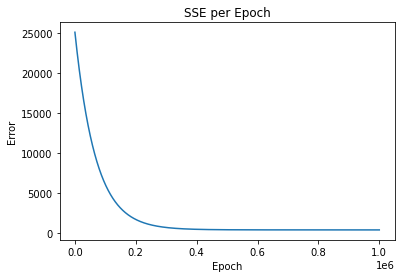

In [20]:
plt.plot(all_errors)
plt.title('SSE per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


 multiple_deltaVal_w1_arr [-4.24486844e+03 -4.24483717e+03 -4.24480590e+03 ... -7.28063046e-01
 -7.28043274e-01 -7.28023501e-01]


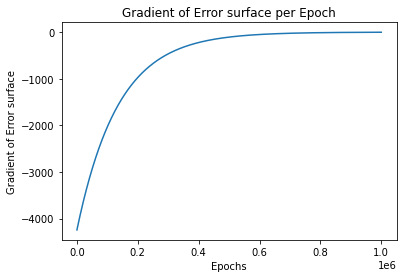

In [21]:
print('\n multiple_deltaVal_w1_arr', multiple_deltaVal_w1_arr)
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(single_deltaVal_w1_arr,'b-o')
plt.plot(multiple_deltaVal_w1_arr)
plt.title('Gradient of Error surface per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Gradient of Error surface')
plt.show()

In [22]:
print('The final values of w1, and w0')
print('---------------------------------')
print('w1 = {}'.format(w1))

print('w0  = {}'.format(w0))

The final values of w1, and w0
---------------------------------
w1 = 5.539157850653172
w0  = 1.2306877249121813


In [23]:
from pyspark.sql import functions as sparkf
from pyspark.sql.types import *

In [24]:
def lineareq(origi,m,b):
  result = (origi*m)+b
  return result
sparkf_lineareq = sparkf.udf(lambda x,m,b: lineareq(x,m,b))

In [25]:
raw_df.show()

+---+------+
|yoe|salary|
+---+------+
|  2|    15|
|  3|    28|
|  5|    42|
| 13|    64|
|  8|    50|
| 16|    90|
| 11|    58|
|  1|     8|
|  9|    54|
+---+------+



In [26]:
raw_df.printSchema()

root
 |-- yoe: long (nullable = true)
 |-- salary: long (nullable = true)



In [27]:
result_df = raw_df.withColumn('prediction',sparkf_lineareq(sparkf.col('yoe'),sparkf.lit(w1),sparkf.lit(w0)))

In [28]:
result_df.show()

+---+------+------------------+
|yoe|salary|        prediction|
+---+------+------------------+
|  2|    15|12.309003426218526|
|  3|    28|17.848161276871696|
|  5|    42| 28.92647697817804|
| 13|    64| 73.23973978340342|
|  8|    50| 45.54395053013756|
| 16|    90| 89.85721333536294|
| 11|    58| 62.16142408209708|
|  1|     8| 6.769845575565354|
|  9|    54|51.083108380790726|
+---+------+------------------+



In [29]:
result_df.withColumn('Error',sparkf.col('salary')-sparkf.col('prediction'))\
.withColumn('square of Error',sparkf.col('Error')**2).show()

+---+------+------------------+-------------------+--------------------+
|yoe|salary|        prediction|              Error|     square of Error|
+---+------+------------------+-------------------+--------------------+
|  2|    15|12.309003426218526|  2.690996573781474|   7.241462560103632|
|  3|    28|17.848161276871696| 10.151838723128304|   103.0598294604073|
|  5|    42| 28.92647697817804|  13.07352302182196|  170.91700420210876|
| 13|    64| 73.23973978340342| -9.239739783403422|   85.37279126500792|
|  8|    50| 45.54395053013756|  4.456049469862442|  19.856376877861354|
| 16|    90| 89.85721333536294|0.14278666463705747|0.020388031598175517|
| 11|    58| 62.16142408209708| -4.161424082097078|  17.317450391057505|
|  1|     8| 6.769845575565354| 1.2301544244346463|  1.5132799079561359|
|  9|    54|51.083108380790726| 2.9168916192092738|     8.5082567182133|
+---+------+------------------+-------------------+--------------------+



แสดง SSE จากการ Prediction บน training set ทั้งหมด ด้วย optimized weight

In [30]:
result_df.withColumn('Error',sparkf.col('salary')-sparkf.col('prediction'))\
.withColumn('square of Error',sparkf.col('Error')**2)\
.agg(sparkf.sum(sparkf.col('square of Error')).alias('SSE')).show()

+------------------+
|               SSE|
+------------------+
|413.80683941431414|
+------------------+



In [31]:
multiple_deltaVal_w1_arr.min()

-4244.868444435927

แสดง Gradient ที่เข้าใกล้ศูนย์

In [32]:
(multiple_deltaVal_w1_arr*-1).min()

0.72802350126139

แสดง Error ที่ต่ำที่สุด

In [33]:
min(all_errors)

413.80684846558324